# Demystifying implied volatility: Understanding volatility term structure and skew

The options implied volatility term structure is a way to understand how the market perceives the future volatility of a stock over time. It shows the relationship between the implied volatilities of options with different expiration dates on the same stock.

And it matters.

By analyzing this term structure, traders can gain insights into market expectations of future volatility. The term structure can take different shapes, such as upward-sloping, downward-sloping, or flat, which indicate the market’s expectations.

There’s more.

Implied volatility skew refers to the difference in implied volatilities between options with different strike prices but the same expiration date. It shows how the market prices options based on their proximity to the current stock price.

These tools are essential for options traders and investors as they help in pricing options accurately, assessing risk, and constructing trading strategies.

In [1]:
# Imports and set up

# OpenBB has a suite of methods to download options data. We’ll need it for today’s issue. You can also import Matplotlib to do some light formatting on the charts.

from openbb_terminal.sdk import openbb

import matplotlib.pyplot as plt
plt.rc("font", size=10)
# Downloading the options chains is one line of code.

chains = openbb.stocks.options.chains(
    symbol="SPY",
    source="YahooFinance"
)

expirations = openbb.stocks.options.expirations("SPY")

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://docs.openbb.co/sdk/quickstart/installation/

Output()

In [2]:
# Build the term structure

# Now that you have the options chains, you need to do some pandas magic. But first, we need the last price of the underlying to find at the money options.

last = (
    openbb
    .stocks
    .load("SPY")
    .iloc[-1]["Adj Close"]
)
# Download the price data and just grab the last adjusted close price from the DataFrame.

# Now, find the at the money (ATM) options.

idx = (
    (chains.strike - last)
    .abs()
    .sort_values()
    .index[0]
)
atm_strike = (
    chains
    .iloc[idx]
    .strike
)


Loading Daily data for SPY with starting period 2020-07-21.

<AxesSubplot:title={'left':'IV term structure for ATM call options'}, xlabel='expiration'>

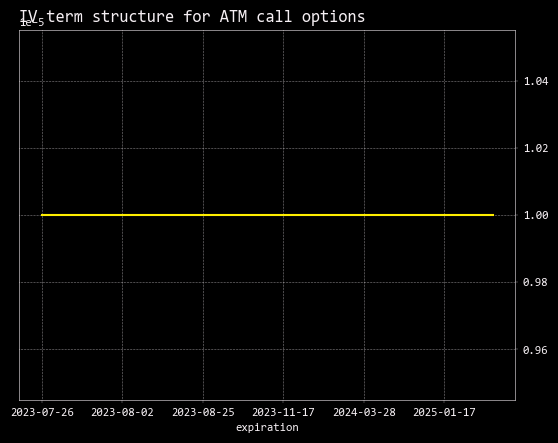

In [4]:
# Now it’s a simple filter on the DataFrame to get the ATM calls and puts.

calls = (
    chains[
        (chains.strike == atm_strike)
        & (chains.optionType == "call")
    ]
)
# We can take a look at the term structure for call options.

(
    calls
    .set_index("expiration")
    .impliedVolatility.plot(title="IV term structure for ATM call options")
)

The term structure is normally upward sloping. There’s a few reasons for this:

1. Higher Future Uncertainty: More volatility expected long-term than short-term. The more time there is until an option’s expiration, the more time there is for the underlying security’s price to change dramatically.

2. Event Risk: Known potential events in the future (like earnings announcements, economic indicators release, etc.) that could cause the underlying asset to move significantly.

3. Time Premium: Longer-dated options have more time value, increasing implied volatility. The more time an option has until expiration, the greater the chance it has of becoming profitable for the holder.

There’s a spike in the curve since those options are expiring next week and traders are actively trading those contracts to reposition and speculate on future moves in the underlying.



<AxesSubplot:title={'left':'IV term structure for call options expiring 2023-07-27'}, xlabel='strike'>

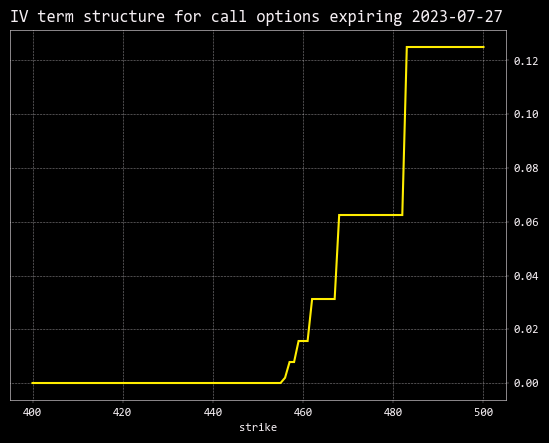

In [5]:
# Build the skew

# To plot the implied volatility skew, select an expiration.

calls = (
    chains[
        (chains.expiration == expirations[4])
        & (chains.optionType == "call")
    ]
)
# Instead of filtering the DataFrame by strike, we filter it by a single expiration.

# Now plot the skew.

(
    calls
    .set_index("strike")
    .impliedVolatility
    .plot(title=f"IV term structure for call options expiring {expirations[1]}")
)

We see somewhere between negative skew and a volatility “smile.” In the case of negative skew, the market may be preparing for a drop and traders are bidding up out of the money options for downside protection.

A smile suggests the market might be expecting a big move in either direction. Smiles are often seen around news events or earnings announcements.